<a href="https://colab.research.google.com/github/MichelaPascale/AI-Pokemon-Challenge/blob/main/Notebook_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook di training

## Operazioni preliminari

###Import librerie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import del training set e test set

In [2]:
#train = pd.read_csv("./train.csv")
#test = pd.read_csv("./test.csv")

# con colab non è necessario il ./
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
#pokemon = pd.read_csv("./pokemon.csv")

pokemon = pd.read_csv("pokemon.csv")

## Analisi dei dati

### Verifica della correttezza dei dati

#### Train e test set

In [6]:
train.sample(5)

,Winner,First_pokemon,Second_pokemon
11230,656,656,374
27784,329,329,72
23576,147,147,97
23356,228,228,30
20232,172,172,680


In [7]:
train.describe(include="all")

,Winner,First_pokemon,Second_pokemon
count,32000.000000,32000.000000,32000.000000
mean,409.861094,402.504188,402.972438
std,231.054139,229.858711,229.932855
min,1.000000,1.000000,1.000000
25%,207.000000,204.000000,207.000000
50%,423.000000,402.000000,403.000000
75%,607.000000,600.250000,602.000000
max,800.000000,800.000000,800.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Winner          32000 non-null  int64
 1   First_pokemon   32000 non-null  int64
 2   Second_pokemon  32000 non-null  int64
dtypes: int64(3)
memory usage: 750.1 KB


In [ ]:
pd.isnull(train).sum()

Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Winner          8000 non-null   int64
 1   First_pokemon   8000 non-null   int64
 2   Second_pokemon  8000 non-null   int64
dtypes: int64(3)
memory usage: 187.6 KB


In [9]:
pd.isnull(test).sum()

Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

Ok, non ho valori nulli o altro che devo cambiare

In [ ]:
train.head(5)

,Winner,First_pokemon,Second_pokemon
0,124,124,221
1,1,323,1
2,58,58,459
3,491,180,491
4,799,799,559


#### Pokemon stats

In [11]:
pokemon.sample(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
165,166,Mew,Psychic,NaN,100,100,100,100,100,100,1,False
789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,6,False
446,447,Kricketot,Bug,NaN,37,25,41,25,41,25,4,False
478,479,Honchkrow,Dark,Flying,100,125,52,105,52,71,4,False
635,636,Gothita,Psychic,NaN,45,30,50,55,65,45,5,False


Da una prima analisi, per semplicità e chiarezza, posso rinominare la colonna # in ID ed eliminare gli spazi delle colonne Type 1 e Type 2

In [12]:
# Rinomino
pokemon = pokemon.rename(columns={'#': 'ID'})
pokemon = pokemon.rename(columns={'Type 1': 'Type1'})
pokemon = pokemon.rename(columns={'Type 2': 'Type2'})

In [14]:
pokemon.head(5)

,ID,Name,Type1,Type2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [15]:
pokemon.describe(include='all')

,ID,Name,Type1,Type2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.0000,799,800,414,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,NaN,799,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Mega Ampharos,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,400.5000,NaN,NaN,NaN,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,231.0844,NaN,NaN,NaN,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,1.0000,NaN,NaN,NaN,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,200.7500,NaN,NaN,NaN,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,400.5000,NaN,NaN,NaN,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,600.2500,NaN,NaN,NaN,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


In [21]:
pokemon

,ID,Name,Type1,Type2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          800 non-null    int64 
 1   Name        799 non-null    object
 2   Type1       800 non-null    object
 3   Type2       414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


##### Valori nulli Pokemon stats

In [ ]:
#Verifica dei valori nulli

pd.isnull(pokemon).sum()

ID              0
Name            1
Type1           0
Type2         386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Type2 ha 386 valori nulli, ma prima di modificare il dataframe, analizzo i dati e, dai grafici, cerco delle info che possano essere utili

In [18]:
t2_nan_values = pokemon.loc[pokemon['Type2'].isnull()]

In [19]:
t2_nan_values

,ID,Name,Type1,Type2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
775,776,Sliggoo,Dragon,NaN,68,75,53,83,113,60,6,False
776,777,Goodra,Dragon,NaN,90,100,70,110,150,80,6,False
788,789,Bergmite,Ice,NaN,55,69,85,32,35,28,6,False
789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,6,False


Ok, adesso grafico i dati ottenuti

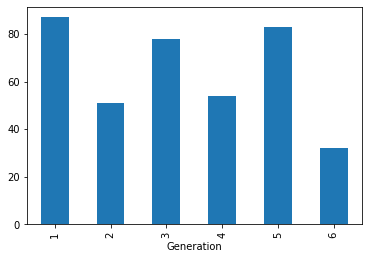

In [47]:
# Per ogni Generazione vedo quanti pokemon ci sono con Type2 nan

t2_nan_values.groupby('Generation').count().Name.plot(kind='bar')

In [20]:
t2_nan_values.groupby('Generation').count().Name

Generation
1    87
2    51
3    78
4    54
5    83
6    32
Name: Name, dtype: int64

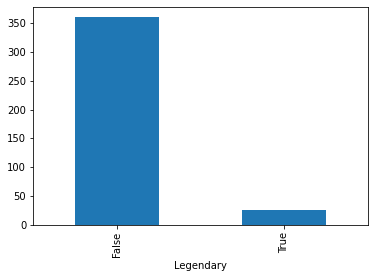

In [48]:
# Per ogni pokemon leggendario, vedo quanti sono con Type2 nan

t2_nan_values.groupby('Legendary').count().Name.plot(kind='bar')

In [ ]:
t2_nan_values.groupby('Legendary').count().Name

Legendary
False    360
True      25
Name: Name, dtype: int64

Poichè sono dei valori abbastanza distribuiti, e inoltre i valori di Type2 rappresentano il 48,25% del totale, non posso eliminare semplicemente la colonna e nemmeno le righe con i valori a nan (in questo caso perderei una grande quantità di informazione sulle altre features).
Per questo motivo sostituisco i valori posti a nan con una stringa che mi indica semplicemente che quel pokemon non ha quella tipologia. 
Anche se sto aggiungendo un tipologia del pokemon, questo non cambia il significato del file.

In [22]:
pokemon["Type2"].replace(np.nan, "No", inplace=True)

In [23]:
pokemon.sample(5)

,ID,Name,Type1,Type2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
351,352,Wailord,Water,No,170,90,45,90,45,60,3,False
86,87,Slowbro,Water,Psychic,95,75,110,100,80,30,1,False
326,327,Sableye,Dark,Ghost,50,75,75,65,65,50,3,False
116,117,Lickitung,Normal,No,90,55,75,60,75,30,1,False
374,375,Crawdaunt,Water,Dark,63,120,85,90,55,55,3,False


### Grafici sui dati

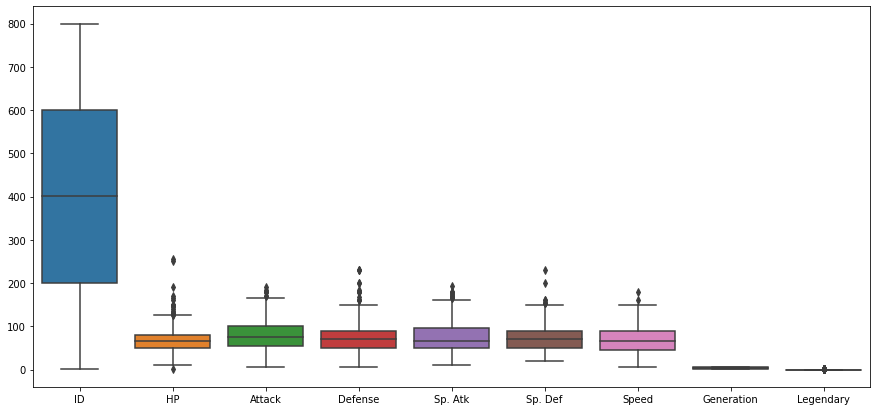

In [45]:
# Variazioni dei dati in generale

plt.figure(figsize = (15,7))
sns.boxplot(data = pokemon)

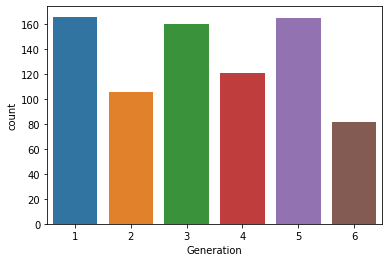

In [24]:
sns.countplot(x=pokemon["Generation"])

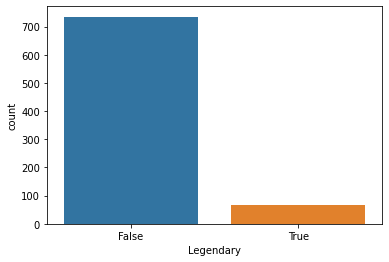

In [25]:
sns.countplot(x=pokemon["Legendary"])

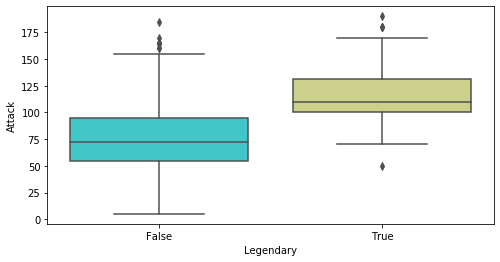

In [ ]:
# boxplot di Attack e Legendary, per verificare se effettivamente i Leggendari hanno più potenza di attacco

plt.figure(figsize=(8, 4))
sns.boxplot(x='Legendary',y='Attack',data=pokemon, palette='rainbow')

Ok, se i pokemon sono leggendari sono più forti in attacco rispetto a quelli che non lo sono, anche se a causa del discostamento le cose potrebbero cambiare

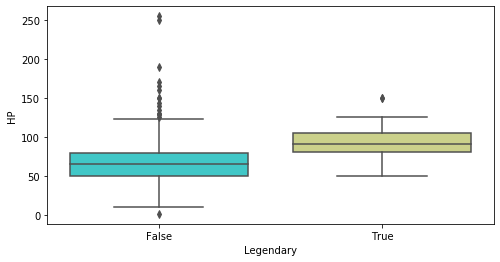

In [ ]:
# boxplot di HP e Legendary, per verificare se effettivamente i Leggendari hanno più punti vita

plt.figure(figsize=(8, 4))
sns.boxplot(x='Legendary',y='HP',data=pokemon, palette='rainbow')

Ok, solitamente questo è vero

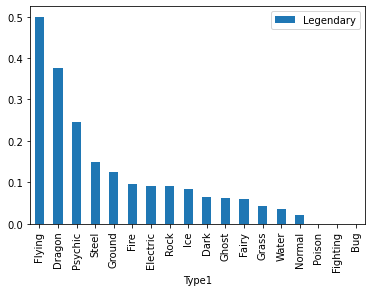

In [40]:
type_1 = pokemon[['Type1','Legendary']].groupby(['Type1'], as_index=False).mean().set_index('Type1')
type_1.sort_values(by='Legendary',ascending=False).plot(kind='bar')

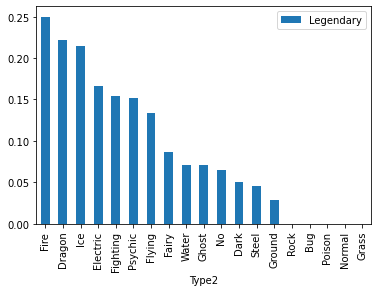

In [42]:
type_2 = pokemon[['Type2','Legendary']].groupby(['Type2'], as_index=False).mean().set_index('Type2')
type_2.sort_values(by='Legendary',ascending=False).plot(kind='bar')

Analizzando per i leggendari, notiamo che sia Type1 che Type2 potrebbero essere utili per predire quali sono i pokemon leggendari

## Preparazione dei dati

In [49]:
# codifico la colonna 'Winner' trasformando i valori in 1 se il vincitore è First_pokemon, 0 se vince Second_pokemon 

train.loc[train['Winner'] == train['First_pokemon'], 'Winner'] = 1
train.loc[train['Winner'] == train['Second_pokemon'], 'Winner'] = 0

test.loc[test['Winner'] == test['First_pokemon'], 'Winner'] = 1
test.loc[test['Winner'] == test['Second_pokemon'], 'Winner'] = 0

### Merge dei due csv

In [50]:
fights = pd.merge(train, pokemon, left_on='First_pokemon', right_on='ID')
fights_test = pd.merge(test, pokemon, left_on='First_pokemon', right_on='ID')

In [51]:
fights = pd.merge(fights, pokemon, left_on='Second_pokemon', right_on='ID')
fights_test = pd.merge(fights_test, pokemon, left_on='Second_pokemon', right_on='ID')

In [53]:
fights.head(10)

,Winner,First_pokemon,Second_pokemon,ID_x,Name_x,Type1_x,Type2_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,Generation_x,Legendary_x,ID_y,Name_y,Type1_y,Type2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Generation_y,Legendary_y
0,1,382,636,382,Feebas,Water,No,20,15,20,10,55,80,3,False,636,Gothita,Psychic,No,45,30,50,55,65,45,5,False
1,1,366,636,366,Altaria,Dragon,Flying,75,70,90,70,105,80,3,False,636,Gothita,Psychic,No,45,30,50,55,65,45,5,False
2,0,492,636,492,Gible,Dragon,Ground,58,70,45,40,45,42,4,False,636,Gothita,Psychic,No,45,30,50,55,65,45,5,False
3,1,214,636,214,Murkrow,Dark,Flying,60,85,42,85,42,91,2,False,636,Gothita,Psychic,No,45,30,50,55,65,45,5,False
4,1,107,636,107,Krabby,Water,No,30,105,90,25,25,50,1,False,636,Gothita,Psychic,No,45,30,50,55,65,45,5,False
5,0,653,636,653,Amoonguss,Grass,Poison,114,85,70,85,80,30,5,False,636,Gothita,Psychic,No,45,30,50,55,65,45,5,False
6,0,456,636,456,Shieldon,Rock,Steel,30,42,118,42,88,30,4,False,636,Gothita,Psychic,No,45,30,50,55,65,45,5,False
7,1,559,636,559,Pignite,Fire,Fighting,90,93,55,70,55,55,5,False,636,Gothita,Psychic,No,45,30,50,55,65,45,5,False
8,1,637,636,637,Gothorita,Psychic,No,60,45,70,75,85,55,5,False,636,Gothita,Psychic,No,45,30,50,55,65,45,5,False
9,1,129,636,129,Seaking,Water,No,80,92,65,65,80,68,1,False,636,Gothita,Psychic,No,45,30,50,55,65,45,5,False


## Studio correlazione tra features

In [ ]:
# il vincitore è un pokemon leggendario?
conditions = [
    (fights['Winner'] == 1),
    (fights['Winner'] == 0)]
choices = [fights['Legendary_x'], fights['Legendary_y']]
fights['LegendaryWinner'] = np.select(conditions, choices)
fights.sample(20)

,Winner,First_pokemon,Second_pokemon,ID_x,Name_x,Type1_x,Type2_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,Generation_x,Legendary_x,ID_y,Name_y,Type1_y,Type2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Generation_y,Legendary_y,LegendaryWinner
8041,1,164,113,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,113,Cubone,Ground,NaN,50,50,95,40,50,35,1,False,1
29659,0,22,541,22,Pidgeotto,Normal,Flying,63,60,55,50,50,71,1,False,541,Dialga,Steel,Dragon,100,120,120,150,100,90,4,True,1
14032,1,791,203,791,Noibat,Flying,Dragon,40,30,35,45,40,55,6,False,203,Hoppip,Grass,Flying,35,35,40,35,55,50,2,False,0
8882,1,699,223,699,Volcarona,Bug,Fire,85,60,65,135,105,100,5,False,223,Gligar,Ground,Flying,65,75,105,35,65,85,2,False,0
21260,1,275,725,275,Sceptile,Grass,NaN,70,85,65,105,85,120,3,False,725,Froakie,Water,NaN,41,56,40,62,44,71,6,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19699,0,591,623,591,Audino,Normal,NaN,103,60,86,60,86,50,5,False,623,Sigilyph,Psychic,Flying,72,58,80,103,80,97,5,False,0
283,0,585,3,585,Boldore,Rock,NaN,70,105,105,50,40,20,5,False,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,0
29462,0,465,500,465,Pachirisu,Electric,NaN,60,45,70,45,90,95,4,False,500,Hippopotas,Ground,NaN,68,72,78,38,42,32,4,False,0
4883,0,766,620,766,Heliolisk,Electric,Normal,62,55,52,109,94,109,6,False,620,Crustle,Bug,Rock,70,95,125,65,75,45,5,False,0


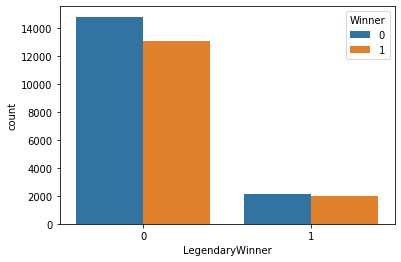

In [ ]:
# contiamo il numero di scontri vinti da un pokemon leggendario
sns.countplot(x=fights["LegendaryWinner"],hue=fights["Winner"])

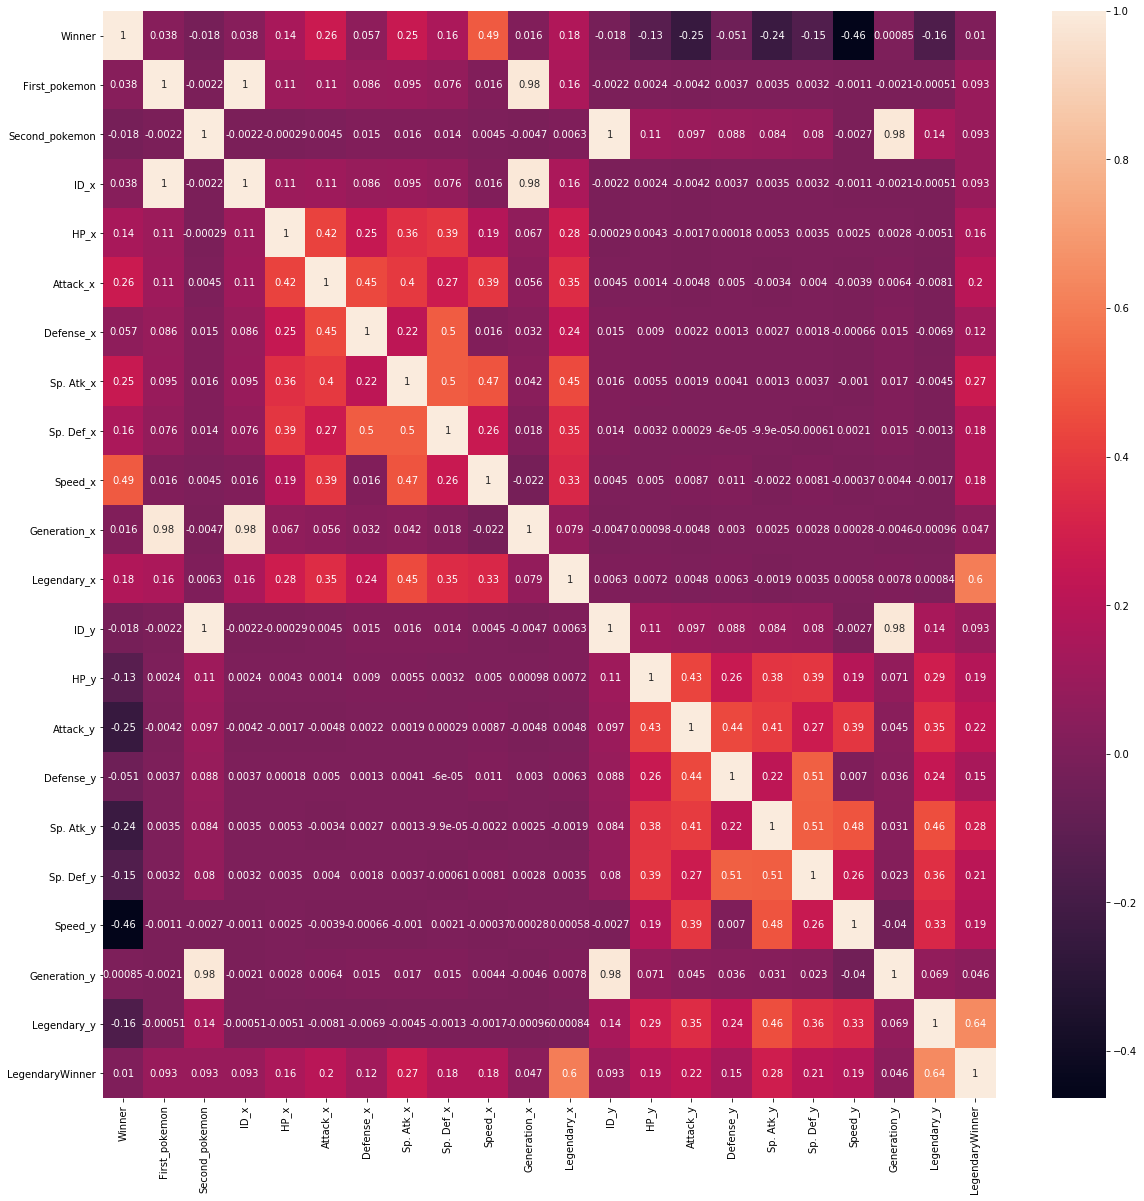

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(fights.corr(), annot=True)
plt.show()

### Ciascun pokemon ha una correlazione elevata con la generazione, per cui può essere rimossa dalle features.

## Feature engineering

In [ ]:
fights["Legendary_x"] = fights["Legendary_x"].astype(int)
fights["Legendary_y"] = fights["Legendary_y"].astype(int)
fights_test["Legendary_x"] = fights_test["Legendary_x"].astype(int)
fights_test["Legendary_y"] = fights_test["Legendary_y"].astype(int)

In [ ]:
fights["Sp_Atk_diff"] = fights["Sp. Atk_x"] - fights["Sp. Atk_y"]
fights["Speed_diff"] = fights["Speed_x"] - fights["Speed_y"]
fights["Sp_Def_diff"] = fights["Sp. Def_x"] - fights["Sp. Def_y"]
fights["Defense_diff"] = fights["Defense_x"] - fights["Defense_y"]
fights["HP_diff"] = fights["HP_x"] - fights["HP_y"]
fights["Attack_diff"] = fights["Attack_x"] - fights["Attack_y"]
fights["Legendary_diff"] = fights["Legendary_x"] - fights["Legendary_y"]

# Name e Generation vengono implicitamente scartate dalla selezione delle features.
# Generation per le motivazioni legate alla correlazione
# Name ed ID perché non utili in quanto tutti valori univoci
fights = fights[["Sp_Atk_diff", "Speed_diff", "Sp_Def_diff", 
                 "Defense_diff", "HP_diff", "Attack_diff", 
                 "Type1_x", "Type1_y", "Type2_x", "Type2_y", 
                 "Legendary_diff", "Winner"]]

In [ ]:
fights_test["Sp_Atk_diff"] = fights_test["Sp. Atk_x"] - fights_test["Sp. Atk_y"]
fights_test["Speed_diff"] = fights_test["Speed_x"] - fights_test["Speed_y"]
fights_test["Sp_Def_diff"] = fights_test["Sp. Def_x"] - fights_test["Sp. Def_y"]
fights_test["Defense_diff"] = fights_test["Defense_x"] - fights_test["Defense_y"]
fights_test["HP_diff"] = fights_test["HP_x"] - fights_test["HP_y"]
fights_test["Attack_diff"] = fights_test["Attack_x"] - fights_test["Attack_y"]
fights_test["Legendary_diff"] = fights_test["Legendary_x"] - fights_test["Legendary_y"]

fights_test = fights_test[["Sp_Atk_diff", "Speed_diff", "Sp_Def_diff", 
                 "Defense_diff", "HP_diff", "Attack_diff", 
                 "Type1_x", "Type1_y", "Type2_x", "Type2_y", 
                 "Legendary_diff", "Winner"]]

In [ ]:
# gestione dei valori nulli di Type2, mettiamo "No" al posto di NaN
fights["Type2_x"].replace(np.nan, "No", inplace=True)
fights["Type2_y"].replace(np.nan, "No", inplace=True)

fights_test["Type2_x"].replace(np.nan, "No", inplace=True)
fights_test["Type2_y"].replace(np.nan, "No", inplace=True)

In [ ]:
fights.sample(15)

,Sp_Atk_diff,Speed_diff,Sp_Def_diff,Defense_diff,HP_diff,Attack_diff,Type1_x,Type1_y,Type2_x,Type2_y,Legendary_diff,Winner
17500,-1,-61,-31,-48,-49,-28,Fairy,Ghost,No,Dragon,-1,0
28409,31,20,46,-27,80,13,Water,Water,Ground,No,0,1
28096,-47,-36,-52,-52,-50,-47,Grass,Psychic,No,Fire,-1,0
20122,35,0,10,-5,33,40,Water,Rock,Dark,Water,0,0
22158,26,-62,27,17,16,-29,Rock,Bug,Grass,Flying,0,0
7353,-35,23,-5,-40,50,85,Ground,Water,Steel,Flying,0,1
26498,60,70,30,40,90,100,Normal,Normal,No,No,0,1
3398,-12,-58,7,7,-10,-2,Electric,Water,No,Flying,0,0
18023,17,-14,75,23,-25,-45,Rock,Ghost,Steel,Grass,0,0
1732,-40,-45,55,85,-20,-15,Steel,Water,Fairy,Dark,0,0


In [ ]:
fights.corr(method = "spearman")

,Sp_Atk_diff,Speed_diff,Sp_Def_diff,Defense_diff,HP_diff,Attack_diff,Legendary_diff,Winner
Sp_Atk_diff,1.000000,0.463801,0.530921,0.263222,0.426216,0.369411,0.416465,0.348872
Speed_diff,0.463801,1.000000,0.285818,0.051054,0.233562,0.369695,0.323050,0.735443
Sp_Def_diff,0.530921,0.285818,1.000000,0.528902,0.442693,0.296223,0.337492,0.240954
Defense_diff,0.263222,0.051054,0.528902,1.000000,0.361091,0.475072,0.256349,0.103221
HP_diff,0.426216,0.233562,0.442693,0.361091,1.000000,0.511449,0.303306,0.232829
Attack_diff,0.369411,0.369695,0.296223,0.475072,0.511449,1.000000,0.332893,0.358636
Legendary_diff,0.416465,0.323050,0.337492,0.256349,0.303306,0.332893,1.000000,0.240189
Winner,0.348872,0.735443,0.240954,0.103221,0.232829,0.358636,0.240189,1.000000


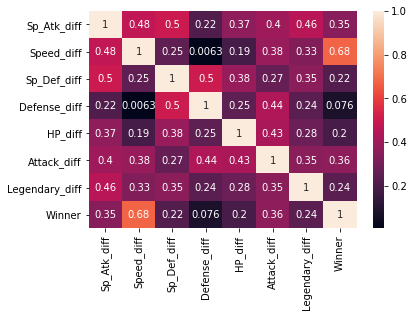

In [ ]:
sns.heatmap(fights.corr(), annot=True)
plt.show()

### La feature 'Defense_diff' ha una correlazione molto bassa, può dunque essere rimossa.

In [ ]:
# elimino per bassa correlazione (dalla heatmap)
fights = fights.drop('Defense_diff', axis=1)
fights_test = fights_test.drop('Defense_diff', axis=1)

## Addestramento del modello

In [ ]:
X_train = fights.drop(["Winner"], axis=1)
y_train = fights["Winner"]

X_test = fights_test.drop(["Winner"], axis=1)
y_test = fights_test["Winner"]

In [ ]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in object_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [ ]:
# fase di training
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print('Test Set predictions:', y_pred)
# verifo l'accuracy del modello
print("Accuracy: {:.2f}%".format(dt.score(X_test, y_test)*100))

Test Set predictions: [1 0 0 ... 0 0 0]
Accuracy: 93.62%
